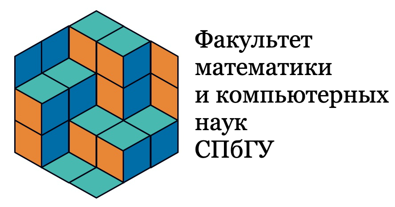


# Мастер-класс по распознаванию лиц с использованием Python

### Введение в Python


<br />
<br />
Александр Авдюшенко <br />
15-18 июня 2020

### Знакомство с Python и NumPy

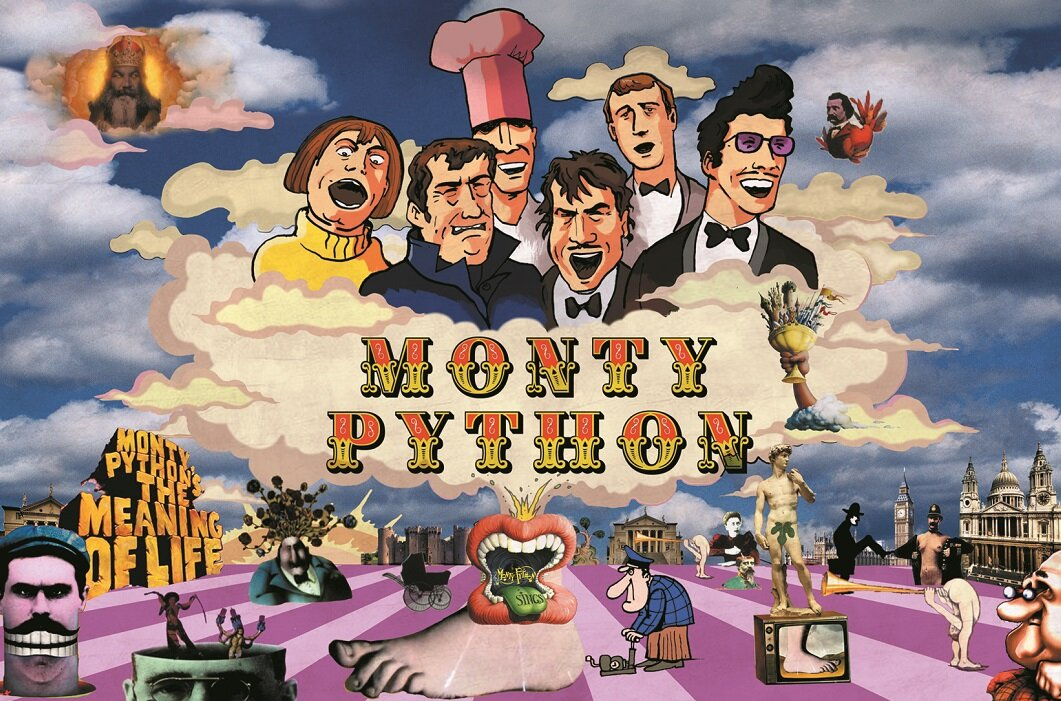

In [1]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Og847HVwRSI" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Язык Python
 * легко [начать использовать](https://colab.research.google.com/)
 * free and open source
 * (почти) portable
 * высокоуровневый
 * интерпретируемый, а не компилируемый
 * REPL = read eval print loop

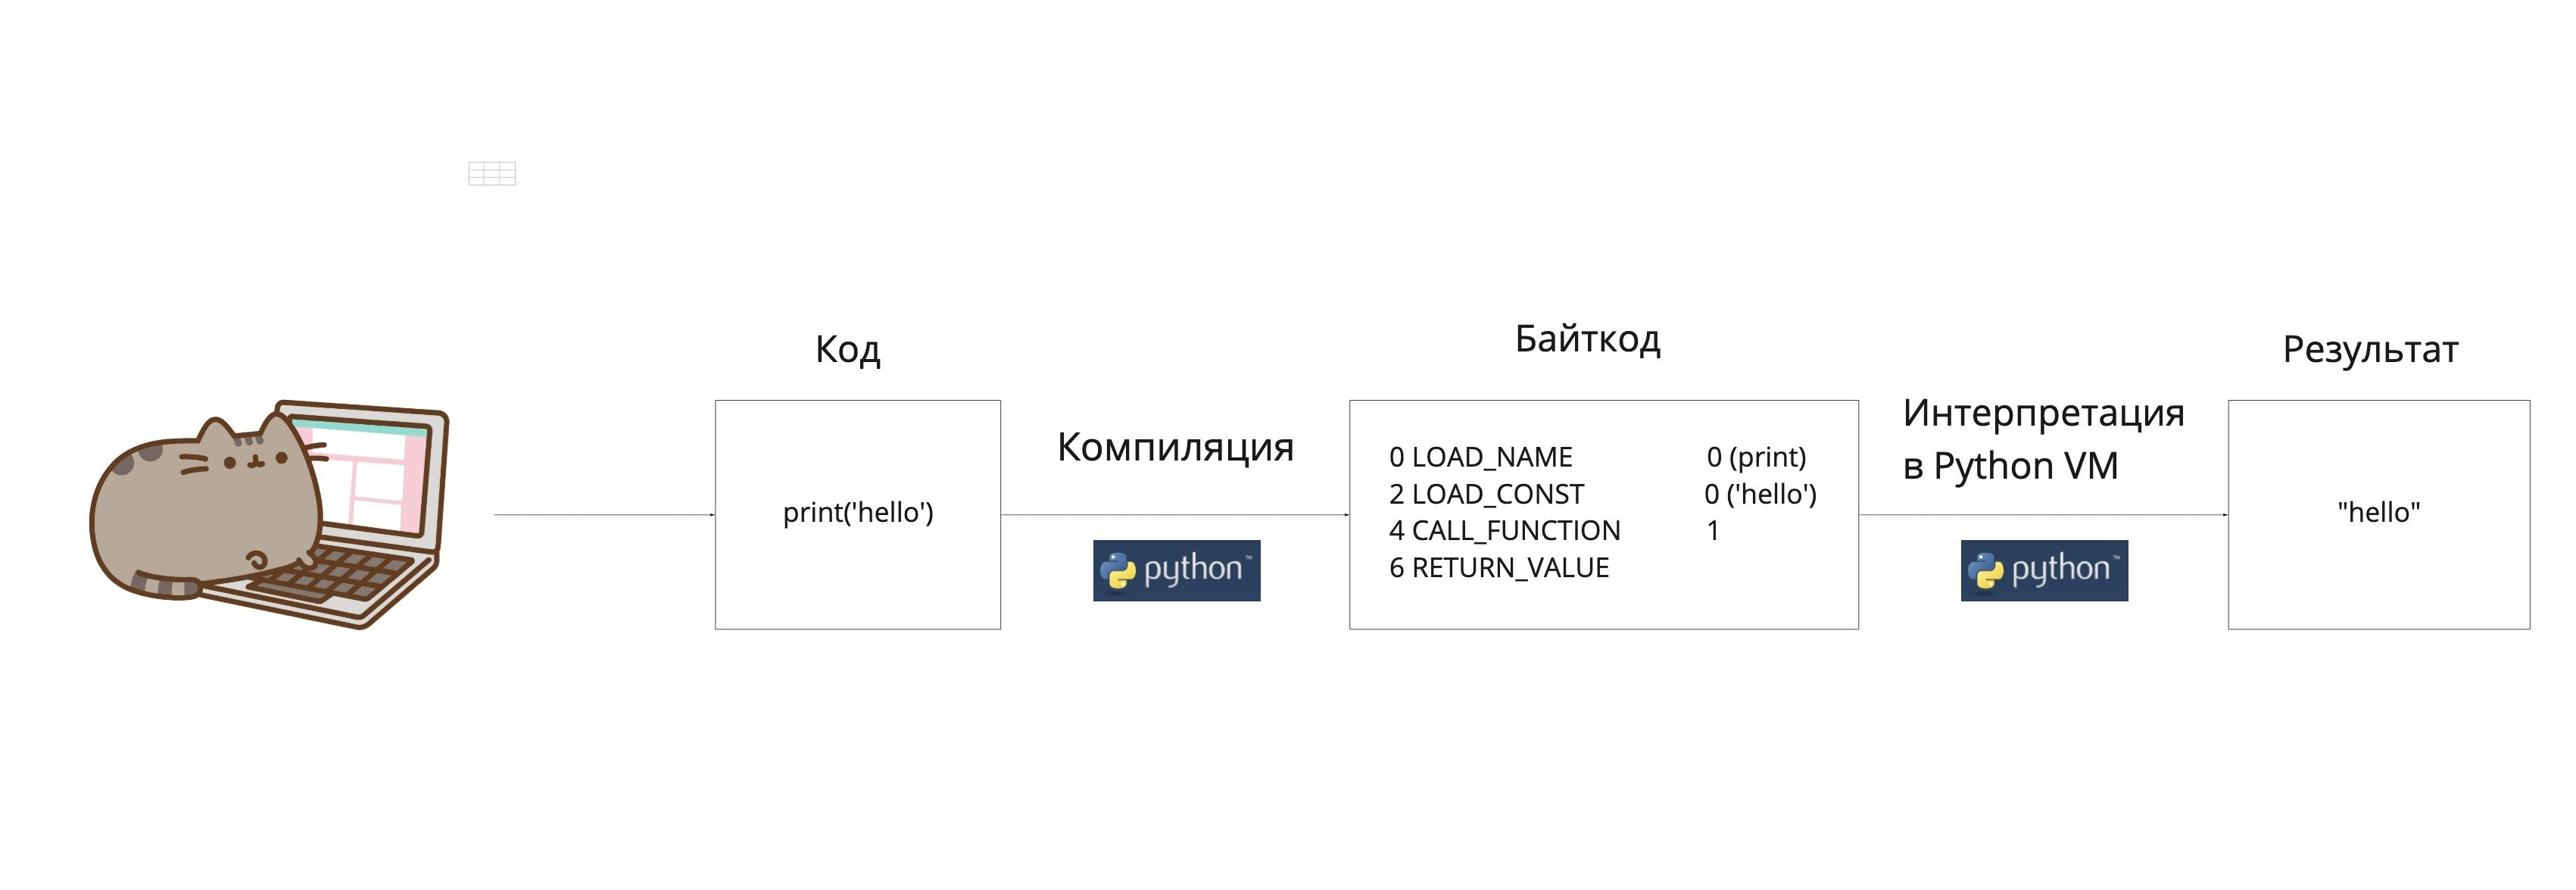

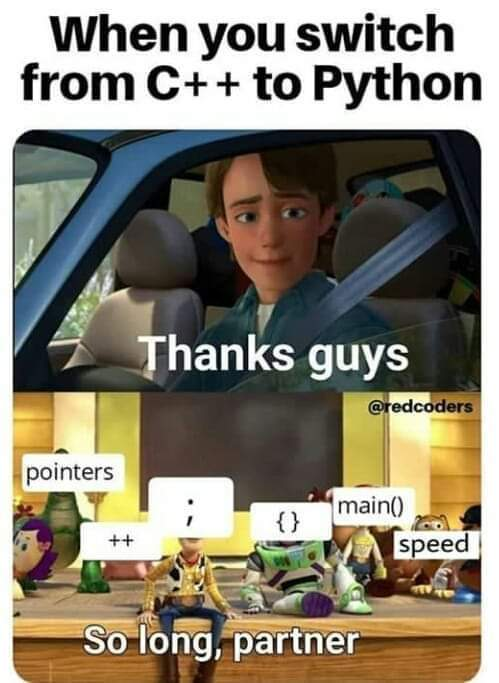

In [2]:
# обратите внимание на отступы — это часть синтаксиса
# они выделяют вложенные блоки кода
for i in range(5):
    if not (i % 3 == 0):
        print(i ** 2)

1
4
16


### Ещё пример
Писать на Python — будто писать псевдокод
$$e^x=\sum_{k=0}^\infty \frac{1}{k!}x^k$$

In [3]:
def e(x):
    sum_, k, term = 1, 0, 1
    while True:
        # like return, but creates generator object
        yield sum_
        k += 1
        term *= x / k
        sum_ += term

In [4]:
x = 1
gen_e_x = e(x)

In [5]:
[next(gen_e_x) for _ in range(5)]

[1, 2.0, 2.5, 2.6666666666666665, 2.708333333333333]

In [6]:
[next(gen_e_x) for _ in range(5)]

[2.7166666666666663,
 2.7180555555555554,
 2.7182539682539684,
 2.71827876984127,
 2.7182815255731922]

# Всё в Питоне — это объект

### У любого объекта
* **id** — где лежит (~адрес в памяти)
* **type** — множество значений и операций над этими значениями
* **value** — значение

In [7]:
id(1), id('1')

(94224783780352, 140618589365168)

In [8]:
type(1), type('1') 

(int, str)

In [9]:
a = 1
b = 1

In [10]:
id(a) == id(1), id(a) == id(b), type(a) == type(1)

(True, True, True)

In [11]:
a, b = 257, 257
id(a) == id(257), id(a) == id(b), type(a) == type(1)

(False, False, True)

In [12]:
a is b # equivalent to id(a) == id(b)

False

## [Size of int in the Python](https://www.quora.com/How-many-bytes-does-an-integer-data-occupy-in-the-Python-language)

Как думаете, сколько памяти занимает int? <br />
Вообще 1 бит это 0 или 1, <br />
1 байт = 8 бит, и это уже от 0 до 255 <br />

Может быть в зависимости от платформы <br />
4 байта (32 бита) или <br />
8 байт (64 бита)?

In [13]:
# давайте проверим!
import sys

def print_sizeof(x):
    return f'{x} — {sys.getsizeof(x)} bytes'

print('\n'.join(['Size of int in Python'] + 
          [print_sizeof(x) for x in (0, 1, 10**10, 10**11, 10**50)]))

Size of int in Python
0 — 24 bytes
1 — 28 bytes
10000000000 — 32 bytes
100000000000 — 32 bytes
100000000000000000000000000000000000000000000000000 — 48 bytes


## Почему так много и [не одинаково](https://stackoverflow.com/questions/10365624/sys-getsizeofint-returns-an-unreasonably-large-value)?

In [14]:
isinstance(1, object)

True

[cpython open source realization](https://github.com/python/cpython/blob/ba85d69a3e3610bdd05f0dd372cf4ebca178c7fb/Include/longintrepr.h#L70)
```c++
struct _longobject {
    // macros with
    // 1. the object’s reference count (8 bytes) 
    // 2. and a pointer to the corresponding type object (8 bytes)
    // 3. and extension field ob_size (8 bytes) 
    PyObject_VAR_HEAD 
    // int value adds 0, 4 or 8 bytes 
    digit ob_digit[1]; 
};
```

In [15]:
[method for method in dir(1) if not method.startswith('__')]

['bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [16]:
print('\n'.join(['Size of objects in Python'] + 
        [print_sizeof(x) for x in (0.0, 1.0)] + [''] +
        [print_sizeof(x) for x in ("a", "aa", "aaa")] + [''] +
        [print_sizeof(x) for x in (list(), ["a"], ["a", "aaa"])] + [''] +
        [print_sizeof(x) for x in (tuple(), ("a",), ("a", "aaa"))] + [''] +
        [print_sizeof(x) for x in (set(), {"a"})] + [''] +
        [print_sizeof(x) for x in (dict(), {1: "a"})] + ['']))

Size of objects in Python
0.0 — 24 bytes
1.0 — 24 bytes

a — 50 bytes
aa — 51 bytes
aaa — 52 bytes

[] — 72 bytes
['a'] — 80 bytes
['a', 'aaa'] — 88 bytes

() — 56 bytes
('a',) — 64 bytes
('a', 'aaa') — 72 bytes

set() — 232 bytes
{'a'} — 232 bytes

{} — 248 bytes
{1: 'a'} — 248 bytes



Словари (dict) и множества (set) в Python реализованы как hash-таблицы, [подробности тут](https://stackoverflow.com/questions/327311/how-are-pythons-built-in-dictionaries-implemented).

| index | slot |
| :----: | :---------------: |
| 0 | <hash\|key\|value> |
| 1 | ... |
| . | ... |
| i | ... |
| . | ... |
| n | ... |

 ## Язык Python
 * мультипарадигменный (объектно-ориентированный, функциональный)
 * «батарейки в комплекте» (богатая стандартная библиотека)
 * PEP (python enhanced proposal), [новое в Python 3.8](https://docs.python.org/3/whatsnew/3.8.html)
 * строгая динамическая типизация*